# Task 1: Data Cleaning & Preprocessing

In [897]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [898]:
df = pd.read_csv("titanic.csv")

In [899]:
print("Shape:", df.shape, end="\n\n")
df.info()
print("\n")
print(df.describe(), end="\n\n")
print("First 5 records")
print(df.head())

Shape: (891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.35

In [900]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


## Handle Missing Values

In [901]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [902]:
df['Age'] = df['Age'].fillna(df['Age'].median())   #  Median is the best for skewed distributions.
df = df.drop(columns=['Cabin'])                    # Drop 'Cabin' due to many missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])    # Fill mode value for Embarked

In [903]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Convert Categorical Features to Numerical (Encoding)

- **Label Encoding** - for binary colums
- **One-Hot Encoding** for non-binary columns

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})     # Encode Sex: male=0, female=1
df = pd.get_dummies(df, columns=['Embarked'])       # One-hot: 3 values - C , Q, S
# df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) 

# 'Name' - unique, no need to encode

## Normalize / Standardize Numerical Features

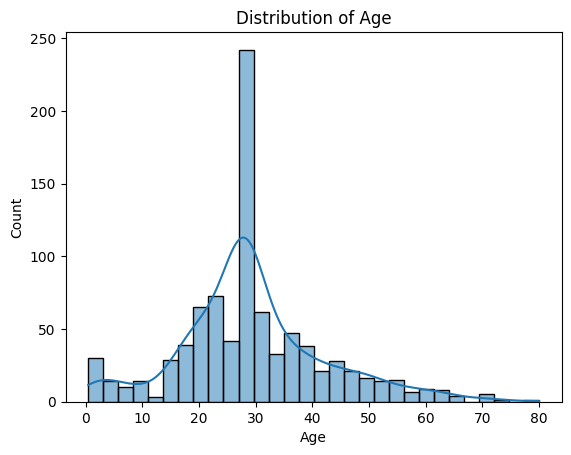

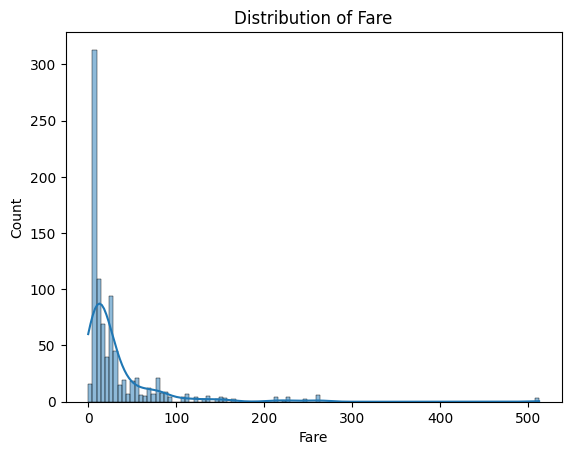

In [905]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")
plt.show()

sns.histplot(df['Fare'], kde=True)
plt.title("Distribution of Fare")
plt.show()

In [906]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# PassengerId - Just an ID, no need to scale
# Survived - Target variable, don't touch
# Pclass - Categorical (1, 2, 3), not real numeric
# Age - Continuous numeric → scale + remove outliers
# SibSp - Discrete count, small range → no scale needed
# Parch - Discrete count, small range → no scale needed
# Fare - Skewed continuous → scale + remove outliers

In [907]:
print(df[['Age', 'Fare']].describe())

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


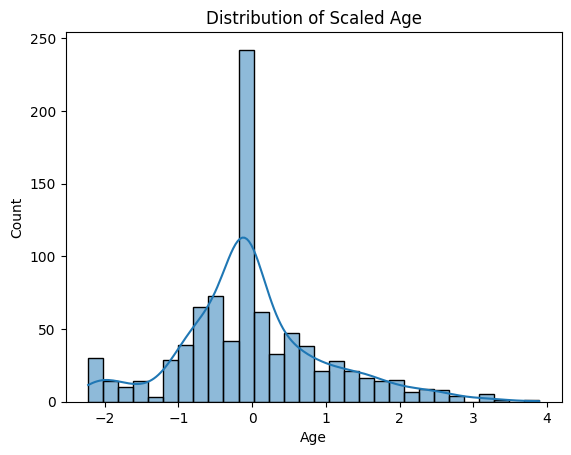

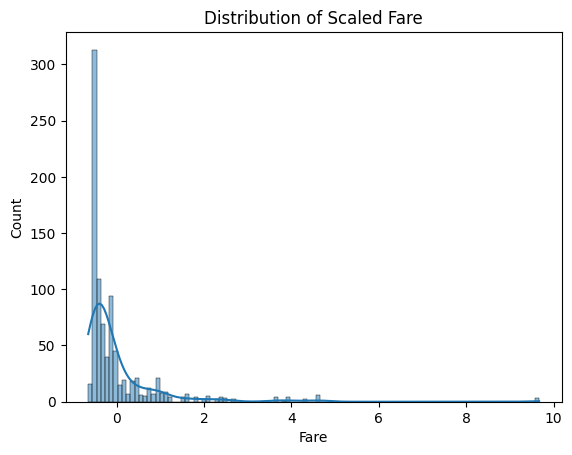

In [908]:
# Plot distributions
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Scaled Age")
plt.show()

sns.histplot(df['Fare'], kde=True)
plt.title("Distribution of Scaled Fare")
plt.show()

## Outlier Detection & Removal using Boxplots & IQR

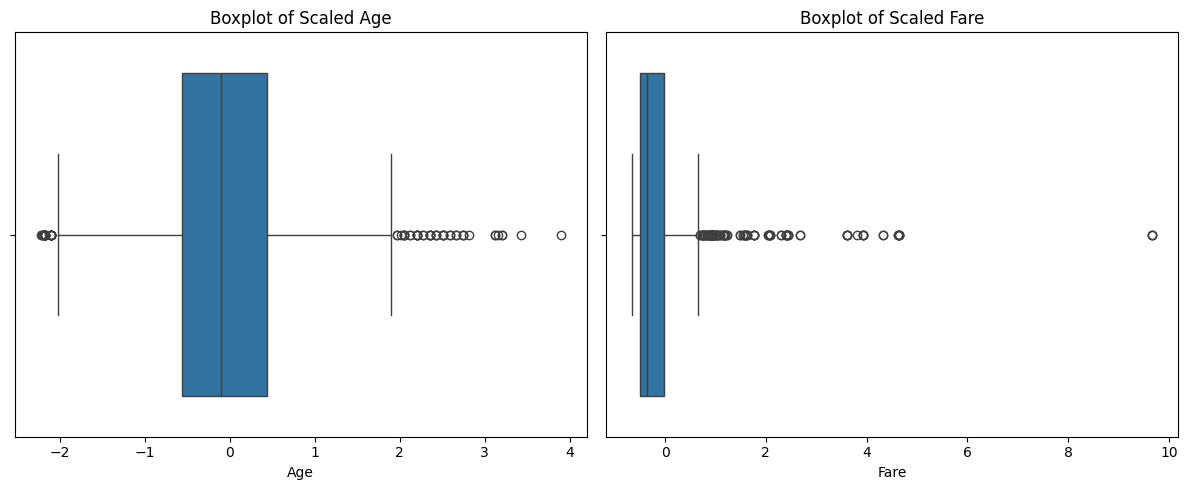

In [909]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Scaled Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Scaled Fare")

plt.tight_layout()
plt.show()

In [910]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers for Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

In [911]:
print("Final shape after removing outliers:", df.shape)

Final shape after removing outliers: (718, 13)


In [912]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
print(df.shape)
print(df.head())


(718, 10)
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   
5         0       3    0 -0.104637      0      0 -0.478116       False   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  


In [913]:
df.to_csv('cleaned.csv', index=False)

## EDA

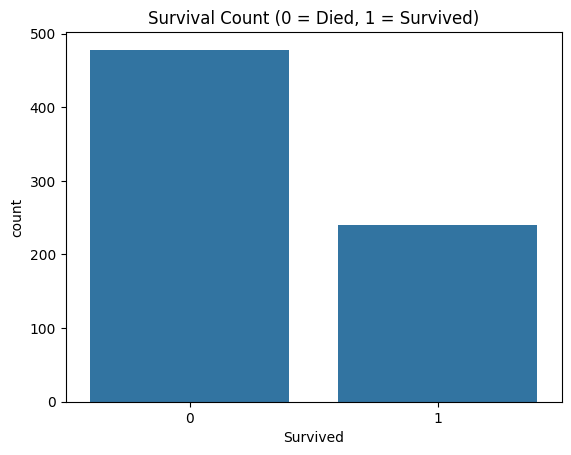

In [914]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

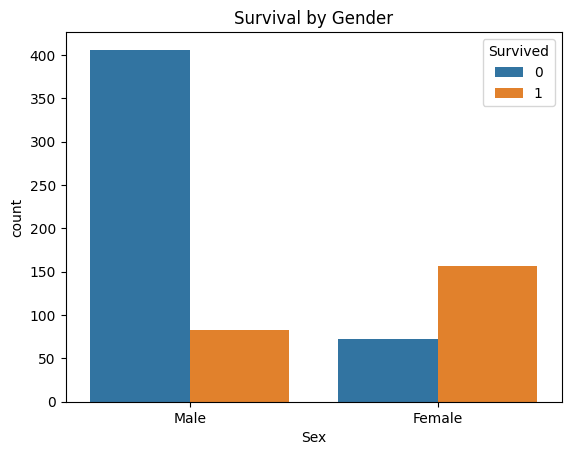

In [915]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

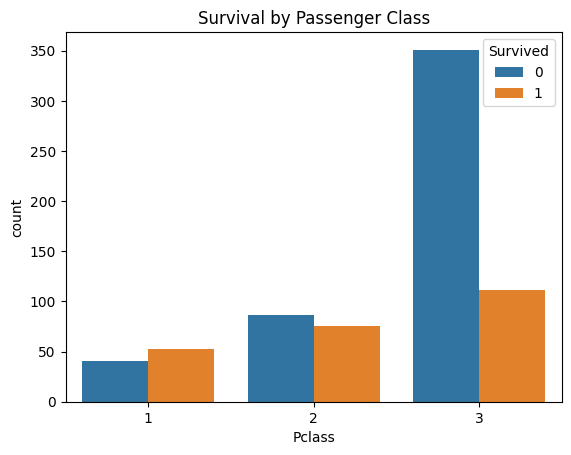

In [916]:
sns.countplot(x='Pclass', hue="Survived" , data=df)
plt.title("Survival by Passenger Class")
plt.show()

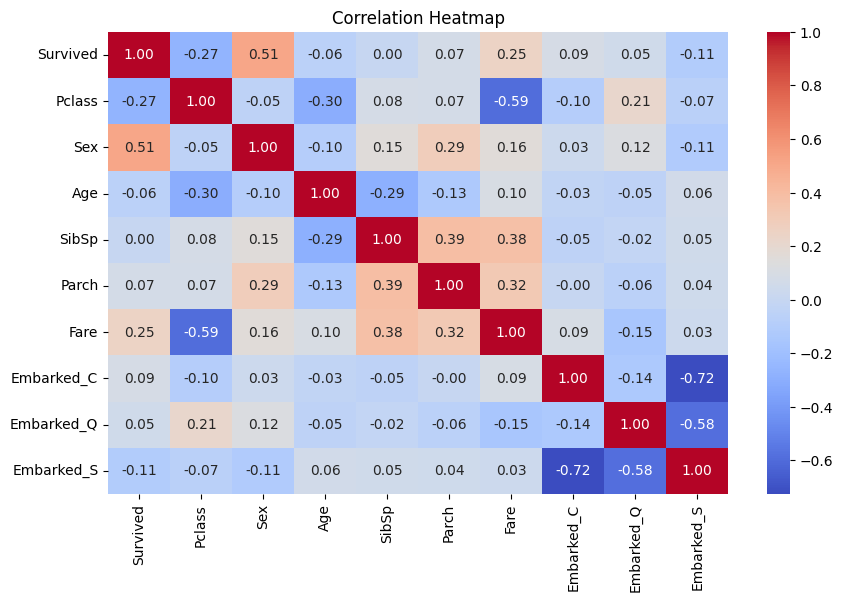

In [917]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

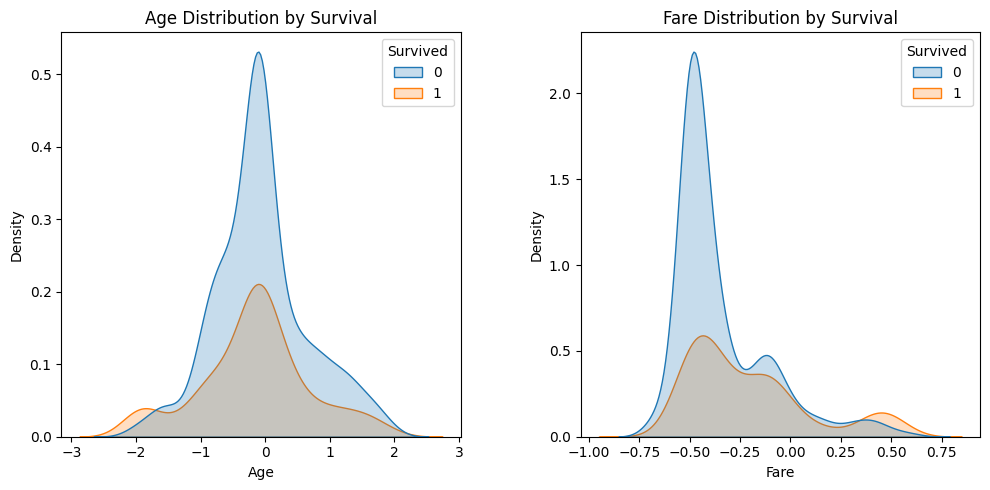

In [918]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title("Age Distribution by Survival")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True)
plt.title("Fare Distribution by Survival")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

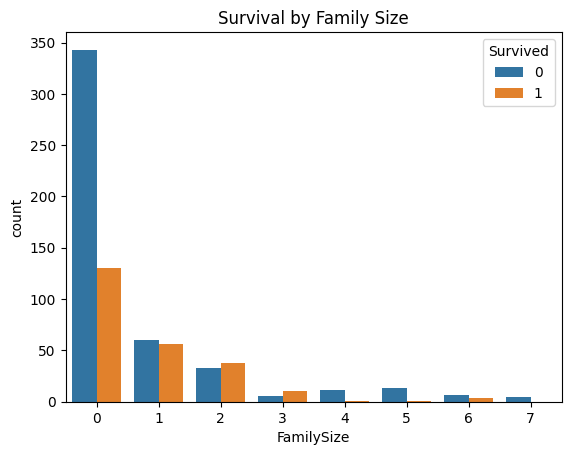

In [919]:
df['FamilySize'] = df['SibSp'] + df['Parch']

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()

## Model Building

In [920]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df['Survived']                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [921]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

model_names = []
accuracies = []


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    model_names.append("".join([x[0] for x in name.split()]))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.7777777777777778
Confusion Matrix:
 [[82 13]
 [19 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        95
           1       0.70      0.61      0.65        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.77      0.78      0.77       144


=== Random Forest ===
Accuracy: 0.7708333333333334
Confusion Matrix:
 [[76 19]
 [14 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.65      0.71      0.68        49

    accuracy                           0.77       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.78      0.77      0.77       144


=== K Nearest Neighbors ===
Accuracy: 0.8194444444444444
Confusion Matrix:
 [[84 11]
 [15 34]]
Classification R

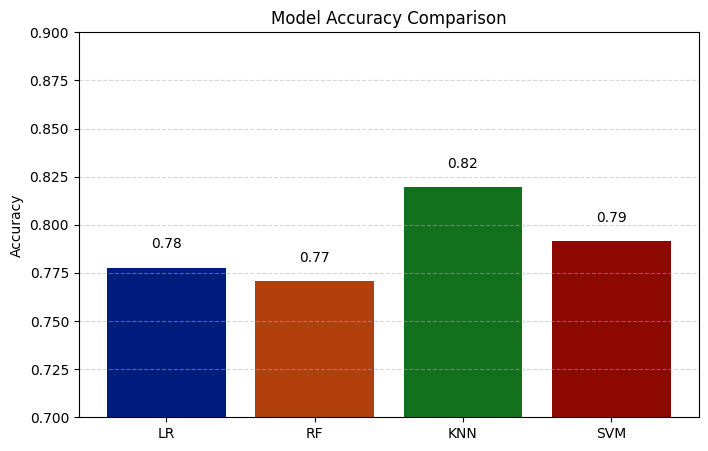

In [922]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette("dark") 
bars = plt.bar(model_names, accuracies, color=colors)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.ylim(0.7, 0.9)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()